In [1]:
import tensorflow
import pickle
from AGCRLEnv import AGCRLEnv
from AGCRLEnvWater import AGCRLEnv as WaterEnv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from tqdm import tqdm
import time
with open('observations.pickle', 'rb') as handle:
    obs = pickle.load(handle)
with open('actions.pickle', 'rb') as handle:
    actions = pickle.load(handle)

# assim_rl_actionspace = np.linspace(0, 100, 21)
# env_assim = AGCRLEnv(obs, actions, "assim_sp", assim_rl_actionspace)

# assim_model = tensorflow.keras.models.load_model(
#     './AGC_API/app/server/tfmodels/assim.model')

In [7]:
actions_assim=[]
rewards_assim=[]
obs=env_assim.resetinit()
obs=list(obs)
prediction = assim_model.predict([obs])
# print(prediction)
action= np.argmax(prediction[0])
actions_assim.append(action)
for i in tqdm(range(0,2000)):
    obs,reward,done=env_assim.step(action)
    obs=list(obs)
    rewards_assim.append(reward)
    prediction = assim_model.predict([obs])
    action= np.argmax(prediction[0])
    actions_assim.append(action)
    

100%|██████████| 2000/2000 [00:38<00:00, 51.36it/s]


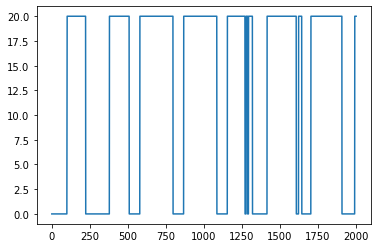

In [8]:
plt.plot(actions_assim)

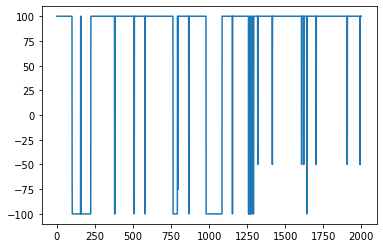

In [9]:
plt.plot(rewards_assim)

In [6]:
sum(rewards_assim)/100

100.0

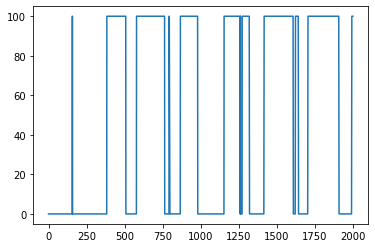

In [10]:
plt.plot(env_assim.actions[0]["assim_sp"][:2000])

In [12]:
theat_rl_actionspace = np.linspace(0, 25, 26)

with open('observations.pickle', 'rb') as handle:
    obs = pickle.load(handle)
with open('actions.pickle', 'rb') as handle:
    actions = pickle.load(handle)

env_heat = AGCRLEnv(obs, actions, "t_heat_sp", theat_rl_actionspace)

heat_model = tensorflow.keras.models.load_model(
    './AGC_API/app/server/tfmodels/heat.model')

In [18]:
actions_heat=[]
rewards_heat=[]
obs=env_heat.reset()
obs=list(obs)
prediction = heat_model.predict([obs])
# print(prediction)
action= np.argmax(prediction[0])
actions_heat.append(action)
for i in tqdm(range(0,30000)):
    obs,reward,done=env_heat.step(action)
    obs=list(obs)
    rewards_heat.append(reward)
    prediction = heat_model.predict([obs])
    action= np.argmax(prediction[0])
    actions_heat.append(action)
    

100%|██████████| 30000/30000 [08:33<00:00, 58.47it/s]


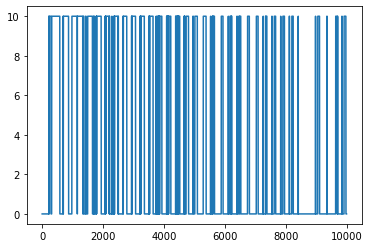

In [23]:
plt.plot(actions_heat[:10000])

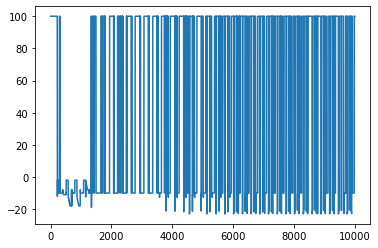

In [24]:
plt.plot(rewards_heat[:10000])

In [25]:
sum(rewards_heat)/30000

50.516103330039975

In [2]:
with open('observations.pickle', 'rb') as handle:
    obs = pickle.load(handle)
with open('actions.pickle', 'rb') as handle:
    actions = pickle.load(handle)

water_rl_actionspace = np.linspace(0, 2000, 9)

env_water = WaterEnv(obs, actions, "water_sup_intervals_sp_min", water_rl_actionspace)

# water_model = tensorflow.keras.models.load_model(
#     './AGC_API/app/server/tfmodels/water.model')

In [6]:
actions_water=[]
rewards_water=[]
obs=env_water.reset()
obs=list(obs)
prediction = water_model.predict([obs])
# print(prediction)
action= np.argmax(prediction[0])
actions_water.append(action)
for i in tqdm(range(0,30000)):
    obs,reward,done=env_water.step(action)
    obs=list(obs)
    rewards_water.append(reward)
    prediction = water_model.predict([obs])
    action= np.argmax(prediction[0])
    actions_water.append(action)
    

100%|██████████| 30000/30000 [10:07<00:00, 49.37it/s]


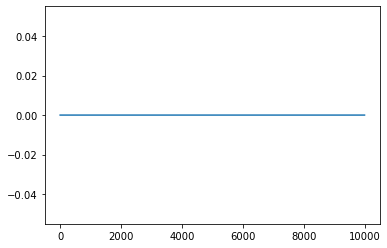

In [7]:
plt.plot(actions_water[:10000])

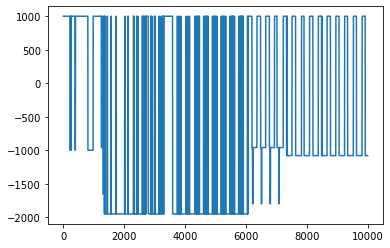

In [8]:
plt.plot(rewards_water[:10000])

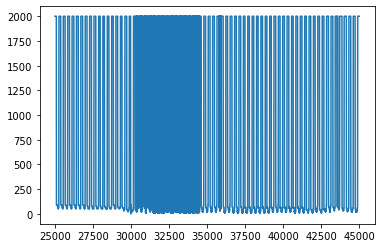

In [9]:
plt.plot(env_water.actions[0]["water_sup_intervals_sp_min"][25000:45000])

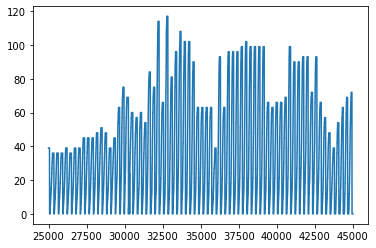

In [10]:
plt.plot(env_water.observations[0]["water_sup"][25000:45000])

In [12]:
env_water.observations[0].columns

Index(['%time', 'AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC',
       'EnScr', 'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup', 'ProdA', 'ProdB', 'avg_nr_harvested_trusses',
       'Truss development time ', 'Nr_fruits_ClassA', 'Weight_fruits_ClassA',
       'Nr_fruits_ClassB', 'Weight_fruits_ClassB', 'Flavour ', 'TSS', 'Acid',
       '%Juice', 'Bite', 'Weight', 'DMC_fruit', 'Stem_elong', 'Stem_thick',
       'Cum_trusses', 'stem_dens ', 'plant_dens'],
      dtype='object')